# 🫀 Heart Disease Classification using Decision Tree

## 📌 Project Overview

This project focuses on building a **Decision Tree Classifier** to predict the presence of heart disease in patients based on their health-related features. The performance of the model is enhanced through **Cost Complexity Pruning** and **K-Fold Cross-Validation**, resulting in a decision tree with strong predictive capabilities:

- ✅ **Accuracy for patients *without* heart disease**: 76.9%  
- ❤️ **Accuracy for patients *with* heart disease**: 81.0%

---

## 🎯 Objective

Given a dataset of patient health records, the objective is to:
> Construct and evaluate a decision tree that classifies heart disease with an **overall accuracy ≥ 70%**.

---

## 🔍 Methodology & Approach

To achieve the goal, the following structured approach is adopted:

1. **📦 Import Libraries & Load Dataset**  
   Load necessary Python libraries and the heart disease dataset.

2. **📊 Exploratory Data Analysis (EDA)**  
   Understand feature distributions, detect missing values, visualize patterns and correlations.

3. **🧹 Data Preprocessing**  
   - Handle missing values  
   - Encode categorical variables  
   - Scale/normalize numerical features if required

4. **🌳 Initial Decision Tree Model**  
   - Train a basic Decision Tree classifier  
   - Evaluate its initial performance

5. **✂️ Cost Complexity Pruning (CCP)**  
   - Prune the tree to prevent overfitting  
   - Choose optimal `ccp_alpha` based on performance

6. **🔁 K-Fold Cross-Validation**  
   - Validate model robustness using k-folds (typically k=5 or k=10)

7. **📈 Improved Model Evaluation**  
   - Assess final performance on unseen data  
   - Compare with baseline

---

## 🧠 Results Summary

The improved decision tree demonstrates strong performance in classifying both classes:

- **No Heart Disease**: 76.9% accuracy  
- **Heart Disease Present**: 81.0% accuracy  
- **Overall Performance**: Satisfies the 70% accuracy requirement

---

## 📚 Dataset Acknowledgement

The dataset used is the **Heart Disease Dataset**, available at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+disease). It contains attributes such as age, sex, chest pain type, resting blood pressure, cholesterol levels, and more.

---

## ✍️ Author

**Er. Jitendra Kumar**  
AI Researcher  
- 🎓 M.Tech, *IIT Kanpur*  
- 🎓 B.Tech, *NIT Surat*

---


## 1. Import Libraries and Modules

In [159]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# For displaying plots inline (Jupyter specific)
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

print("Libraries Imported")


Libraries Imported


## 2. Import Data

In [160]:
# Assign the UCI Machine Learning Repository URL link with the data to a variable, 'url'
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [161]:
# Load the data
df_load = pd.read_csv(url, header = None) # Note that the dataset does not contain headers

# Display the first five rows
df_load.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### 2.1 Inspect the Data

In [162]:
# Display the first five rows
df_load.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [163]:
# Display the last five rows
df_load.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [164]:
# Look at the shae
df_load.shape

(303, 14)

In [165]:
# Examine the dataframe using 'info()'
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       303 non-null    float64
 1   1       303 non-null    float64
 2   2       303 non-null    float64
 3   3       303 non-null    float64
 4   4       303 non-null    float64
 5   5       303 non-null    float64
 6   6       303 non-null    float64
 7   7       303 non-null    float64
 8   8       303 non-null    float64
 9   9       303 non-null    float64
 10  10      303 non-null    float64
 11  11      303 non-null    object 
 12  12      303 non-null    object 
 13  13      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


## 🔎 Observations

- The dataset contains **303 entries (rows)** and **14 features (columns)**.
- Most of the attributes are **numerical**, suitable for input into machine learning models.
- However, **two features contain string (categorical) values**, which need to be encoded for model training.
- The dataset originally **lacked column headers**, so the columns were initially represented as numbers (e.g., `0, 1, 2...`) instead of meaningful names.  
  ➤ This required manual assignment of column names based on the dataset description from the UCI repository.


**Remark:** The header names are available at the UCI Machine Learning Repository site where I retrieved the data. I will insert the header names in the following section.

### 2.2 Correct the Column Names

## 🧾 Attribute Descriptions

Using the documentation from the UCI Machine Learning Repository, we replace the original unnamed columns with meaningful headers. Below are the original features and their descriptions:

| Feature      | Description |
|--------------|-------------|
| `age`        | Age of the patient (in years) |
| `sex`        | Sex of the patient (`1` = male, `0` = female) |
| `cp`         | Chest pain type (`1` = typical angina, `2` = atypical angina, `3` = non-anginal pain, `4` = asymptomatic) |
| `trestbps`   | Resting blood pressure (in mm Hg) |
| `chol`       | Serum cholesterol (in mg/dl) |
| `fbs`        | Fasting blood sugar > 120 mg/dl (`1` = true, `0` = false) |
| `restecg`    | Resting electrocardiographic results:  
  • `0` = normal  
  • `1` = ST-T wave abnormality  
  • `2` = probable/definite left ventricular hypertrophy (by Estes' criteria) |
| `thalach`    | Maximum heart rate achieved |
| `exang`      | Exercise-induced angina (`1` = yes, `0` = no) |
| `oldpeak`    | ST depression induced by exercise relative to rest |
| `slope`      | Slope of the peak exercise ST segment:  
  • `1` = upsloping  
  • `2` = flat  
  • `3` = downsloping |
| `ca`         | Number of major vessels (0–3) colored by fluoroscopy |
| `thal`       | Thalium stress test result:  
  • `3` = normal  
  • `6` = fixed defect  
  • `7` = reversible defect |
| `num`        | Diagnosis of heart disease (`0` = no disease, `1`–`4` = presence of heart disease)  
➡️ This is the **target variable** (will be converted to binary: `0` = no disease, `1` = disease) |



In [168]:
# Create the column names using a list
headers = ["Age",
           "Sex", 
           "CP", 
           "Rest BP", 
           "Cholestoral", 
           "FBS", 
           "Rest ECG", 
           "Thalach", 
           "Exang", 
           "Old Peak", 
           "Slope", 
           "CA", 
           "Thal", 
           "Heart Disease"]

In [169]:
# Assign the new headers to the dataset
df_load.columns = headers

# Display the first five rows
df_load.head()

,Age,Sex,CP,Rest BP,Cholestoral,FBS,Rest ECG,Thalach,Exang,Old Peak,Slope,CA,Thal,Heart Disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 3. Exploratory Data Analysis

Before I cleanse and process the data, it would be beneficial to perform some exploratory data analysis. Doing so will illuminate some of the underlying features and trends in the data.

### 3.1 Summary Statistics Including the Averages, Minimum Values, and Maximum Values

In [170]:
# The average resting blood pressure
print("average resting BP = ", df_load["Rest BP"].mean())

average resting BP =  131.68976897689768


In [171]:
# The average Cholestoral levels
print("average cholestoral = ", df_load["Cholestoral"].mean())

average cholestoral =  246.69306930693068


In [172]:
# The highest Cholestoral level
print("highest cholestoral = ", df_load["Cholestoral"].max())

highest cholestoral =  564.0


In [173]:
# The youngest patient
print("minimum age = ", df_load["Age"].min())

minimum age =  29.0


In [174]:
# The oldest patient
print("maximum age = ", df_load["Age"].max())

maximum age =  77.0


In [175]:
# The maximum heart rate achieved - i.e., Thalach
print("Thalach = ", df_load["Thalach"].max())

Thalach =  202.0


In [176]:
# Generate summary statistics
df_load.describe()

,Age,Sex,CP,Rest BP,Cholestoral,FBS,Rest ECG,Thalach,Exang,Old Peak,Slope,Heart Disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


### 3.2 Drill Down

## 🔬 Interesting Patient Records

During data exploration, a few noteworthy observations were made about specific patients in the dataset:

- 🧒 **Youngest Patient**  
  → The youngest patient in the dataset is **X** years old.

- 👴 **Oldest Patient**  
  → The oldest patient in the dataset is **Y** years old.

- 🩸 **Highest Cholesterol Level**  
  → The patient with the **highest cholesterol** level has a reading of **Z mg/dl**.

- ❤️ **Maximum Heart Rate of 202**  
  → One patient achieved a **maximum heart rate of 202 bpm**, which is notably high.

These cases might be outliers or simply reflect the diversity in patient health characteristics. Investigating these extremes can help identify anomalies, validate data integrity, and improve feature understanding.


My exploration has uncovered a few interesting things. Let's take a closer look at the youngest patient, the oldest patient, the patient with the highest cholestoral levels, and the patient with a maximum heart rate of 202.

In [177]:
# The youngest patient
df_load[df_load["Age"] == 29.00]

,Age,Sex,CP,Rest BP,Cholestoral,FBS,Rest ECG,Thalach,Exang,Old Peak,Slope,CA,Thal,Heart Disease
132,29.0,1.0,2.0,130.0,204.0,0.0,2.0,202.0,0.0,0.0,1.0,0.0,3.0,0


In [178]:
# The oldest patient
df_load[df_load["Age"] == 77.00]

,Age,Sex,CP,Rest BP,Cholestoral,FBS,Rest ECG,Thalach,Exang,Old Peak,Slope,CA,Thal,Heart Disease
161,77.0,1.0,4.0,125.0,304.0,0.0,2.0,162.0,1.0,0.0,1.0,3.0,3.0,4


In [179]:
# The patient with the highest cholestoral levels
df_load[df_load["Cholestoral"] == 564.0]

,Age,Sex,CP,Rest BP,Cholestoral,FBS,Rest ECG,Thalach,Exang,Old Peak,Slope,CA,Thal,Heart Disease
152,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0


## 📝 Observations from Patient Records

From the detailed exploration of specific patient entries, several interesting patterns emerged:

- 🧒 **Youngest Patient Insight**  
  The **youngest patient** in the dataset also recorded the **highest value for `thalach`**, which measures the **maximum heart rate achieved**. This aligns with medical expectations, as younger individuals generally tend to have higher maximum heart rates.

- 👴 **Oldest Patient Insight**  
  The **oldest patient** in the dataset exhibited **exercise-induced angina (`exang = 1`)**, a condition often seen in older individuals due to age-related cardiovascular stress.

- 🚺 **Highest Cholesterol Observation**  
  The patient with the **highest cholesterol level** in the dataset was a **female**. This highlights the importance of not assuming cardiovascular risks are skewed solely toward males, as elevated cholesterol levels can affect any gender.

These observations not only provide insights into individual cases but also reinforce the need to consider **age, sex, and other clinical features together** when building predictive models.


### 3.3 Data Visualizations

#### Scatter Plots

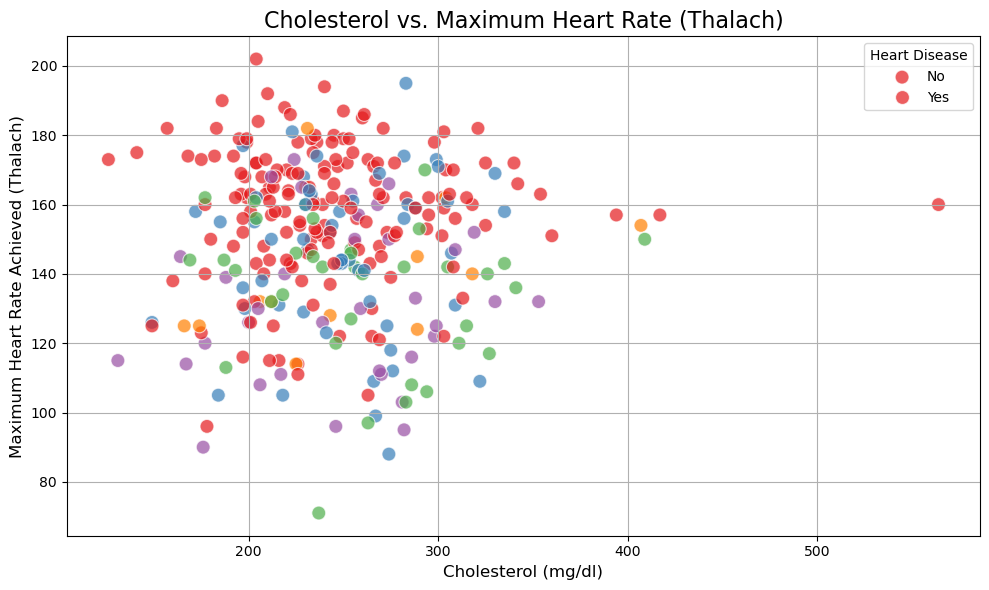

In [180]:
# Scatter plot of Cholesterol vs Maximum Heart Rate Achieved (Thalach)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_load, x="Cholestoral", y="Thalach", hue="Heart Disease", palette="Set1", alpha=0.7, edgecolor='w', s=100)

# Adding labels and title
plt.title("Cholesterol vs. Maximum Heart Rate (Thalach)", fontsize=16)
plt.xlabel("Cholesterol (mg/dl)", fontsize=12)
plt.ylabel("Maximum Heart Rate Achieved (Thalach)", fontsize=12)
plt.grid(True)
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.tight_layout()
plt.show()


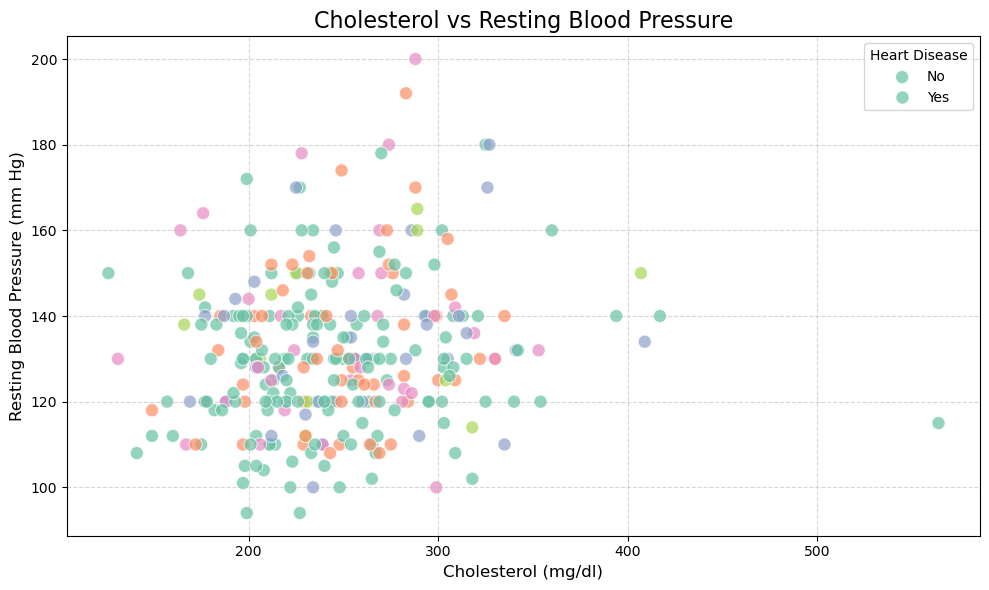

In [181]:
# Scatter plot: Cholesterol vs Resting Blood Pressure
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_load,
    x="Cholestoral",
    y="Rest BP",
    hue="Heart Disease",
    palette="Set2",
    alpha=0.7,
    edgecolor="white",
    s=90
)

# Titles and labels
plt.title("Cholesterol vs Resting Blood Pressure", fontsize=16)
plt.xlabel("Cholesterol (mg/dl)", fontsize=12)
plt.ylabel("Resting Blood Pressure (mm Hg)", fontsize=12)

# Grid and legend
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

#### Histograms

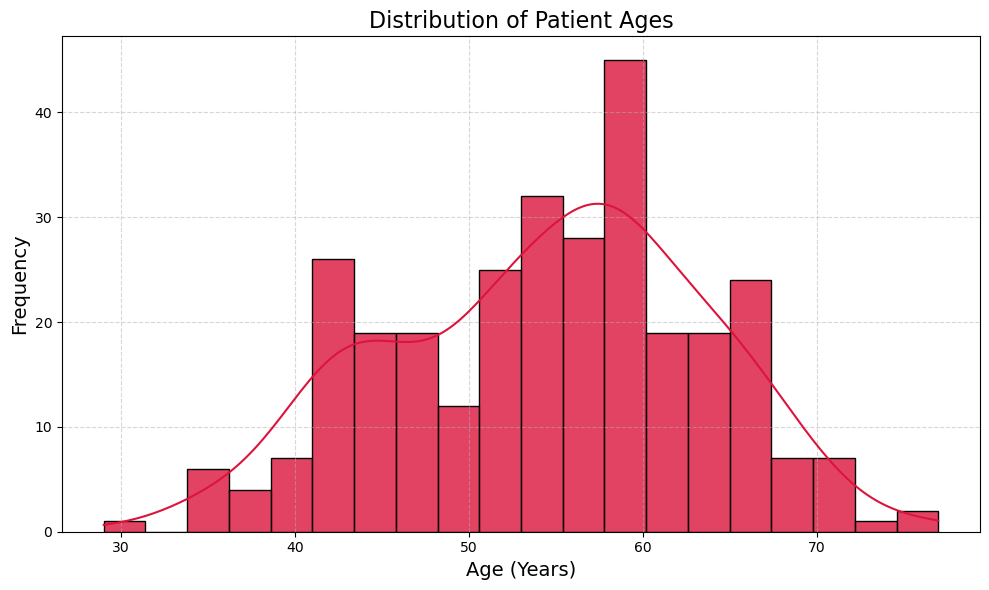

In [182]:
# Histogram of "Age" with KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_load,
    x="Age",
    bins=20,
    kde=True,
    color="crimson",
    edgecolor="black",
    alpha=0.8
)

# Titles and labels
plt.title("Distribution of Patient Ages", fontsize=16)
plt.xlabel("Age (Years)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Grid and layout
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

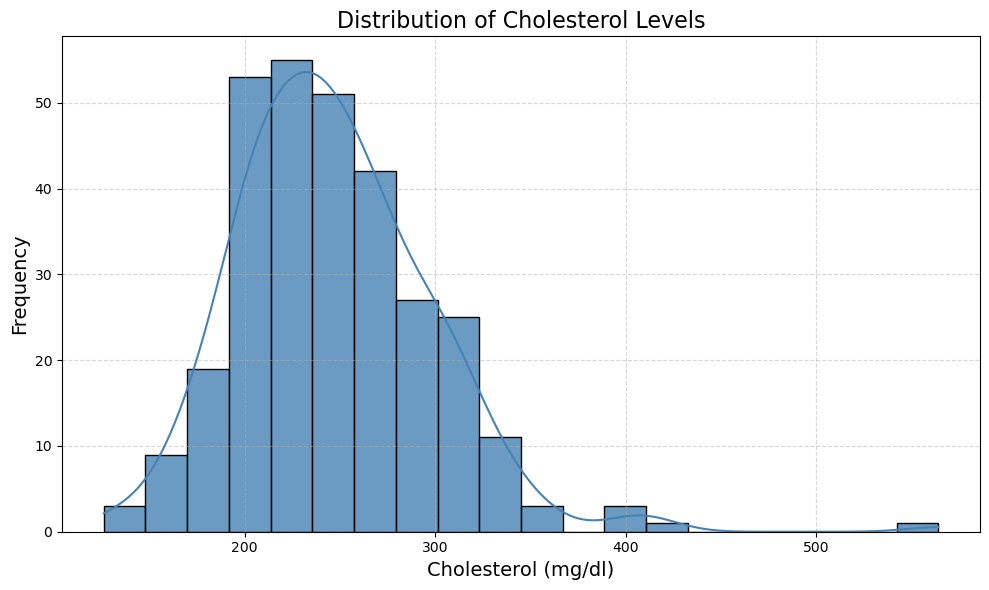

In [183]:
# Histogram of "Cholestoral" with KDE curve
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_load,
    x="Cholestoral",
    bins=20,
    kde=True,
    color="steelblue",
    edgecolor="black",
    alpha=0.8
)

# Titles and axis labels
plt.title("Distribution of Cholesterol Levels", fontsize=16)
plt.xlabel("Cholesterol (mg/dl)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Grid and layout
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

#### Box Plots

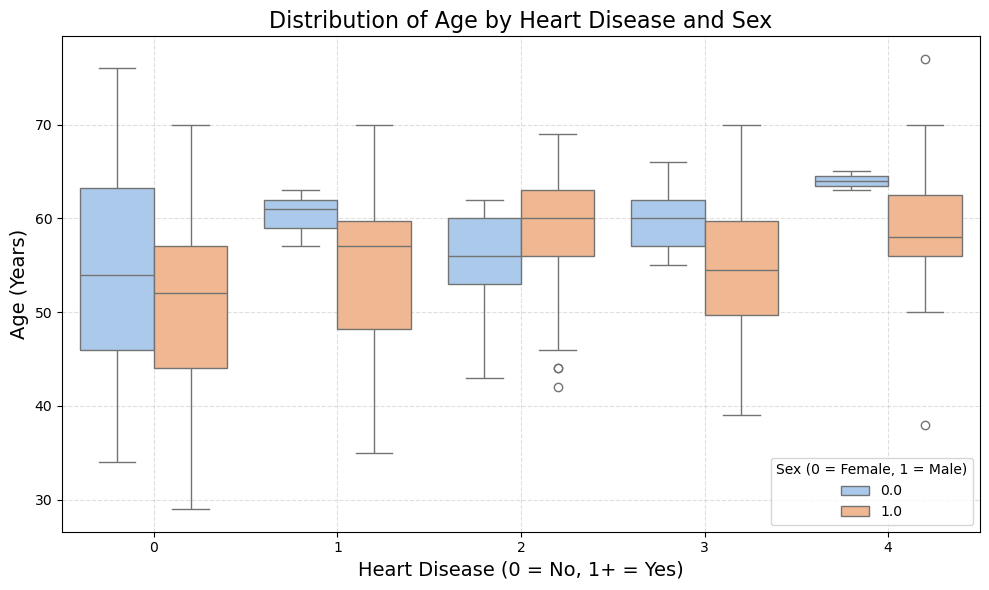

In [184]:
# Box plot of Age vs Heart Disease, grouped by Sex
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_load,
    x="Heart Disease",
    y="Age",
    hue="Sex",
    palette="pastel"
)

# Title and labels
plt.title("Distribution of Age by Heart Disease and Sex", fontsize=16)
plt.xlabel("Heart Disease (0 = No, 1+ = Yes)", fontsize=14)
plt.ylabel("Age (Years)", fontsize=14)
plt.legend(title="Sex (0 = Female, 1 = Male)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

#### Count Plots

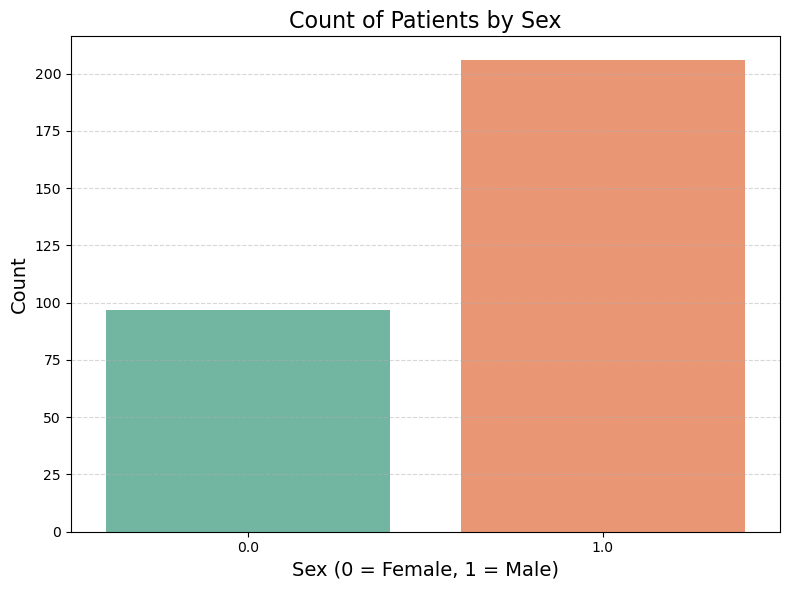

In [185]:
# Count plot for "Sex"
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df_load,
    x="Sex",
    palette="Set2"
)

# Title and axis labels
plt.title("Count of Patients by Sex", fontsize=16)
plt.xlabel("Sex (0 = Female, 1 = Male)", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Grid and layout
plt.grid(True, axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


### 3.4  A Brief Look at Correlation

It might be interesting to look at the correlation values. Afterwards, I'll plot a heat map to illustrate the different correlations that hold between the features in the data frame.

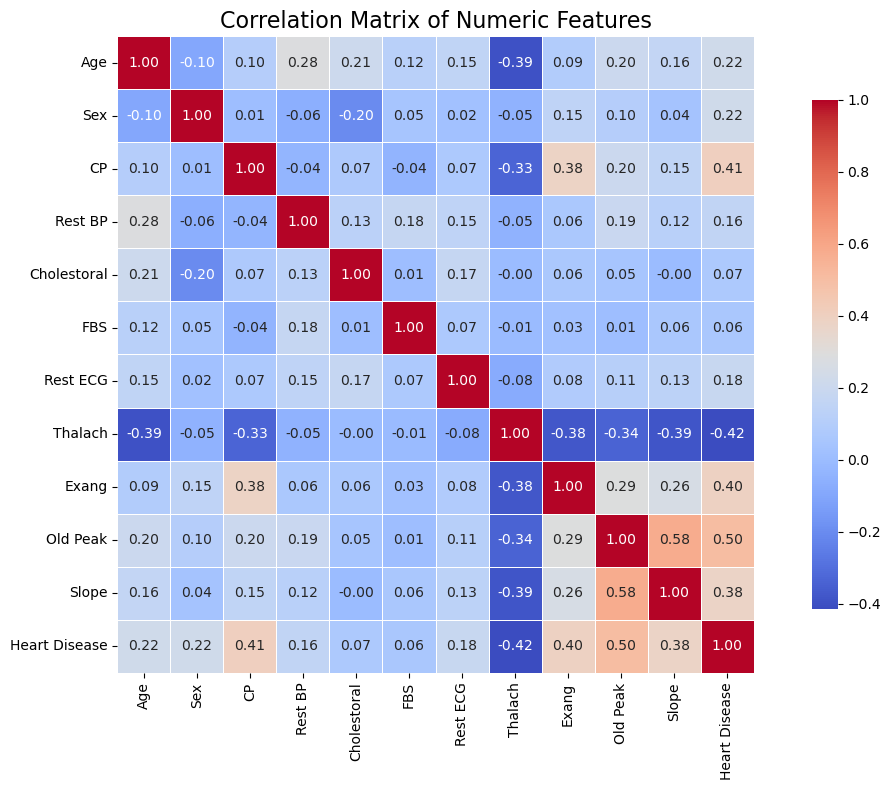

In [186]:
# Compute the correlation matrix
correlation_matrix = df_load.corr(numeric_only=True)

# Display the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)

# Title
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

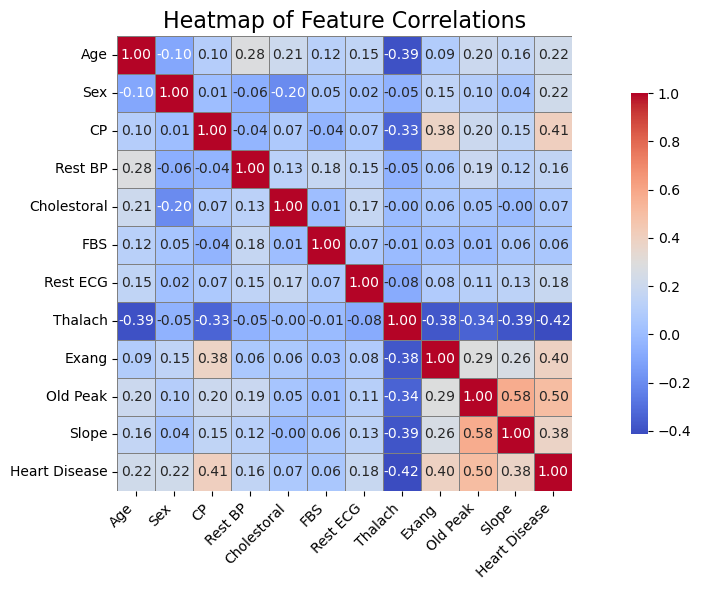

In [187]:
# Compute the correlation matrix (numeric columns only)
correlations = df_load.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create heatmap
sns.heatmap(
    correlations,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={"shrink": 0.75}
)

# Add title and layout adjustments
plt.title("Heatmap of Feature Correlations", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 4. Data Cleansing and Processing

In this section I'm going to clean and prepare the data.

### 4.1 Missing Values

In this section I will locate and missing or null values in the data frame. Any null values will be imputed or handled appropriately.

#### Visualizing Missing Values with a heat map

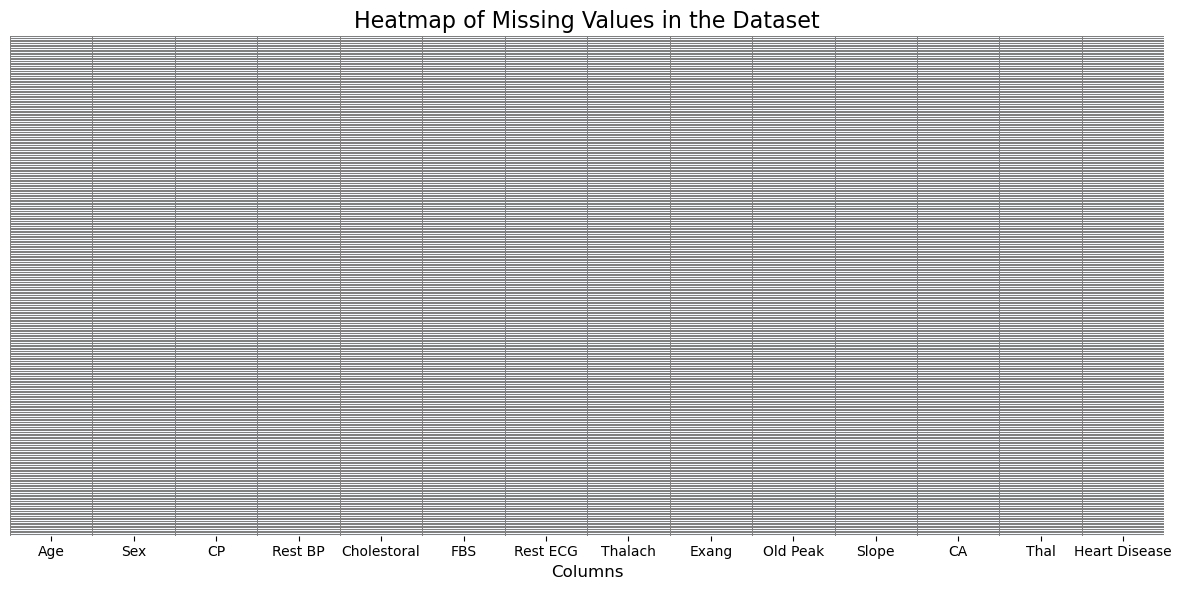

In [188]:
# Heatmap to visualize missing (null) values in the dataset
plt.figure(figsize=(12, 6))
sns.heatmap(
    df_load.isnull(),
    cmap="Blues",
    cbar=False,
    yticklabels=False,
    linewidths=0.5,
    linecolor='gray'
)

# Title and layout
plt.title("Heatmap of Missing Values in the Dataset", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.tight_layout()
plt.show()

**Remark:** The heat map does not show any large amounts of missing data. In fact, the heat map doesn't seem to show the existence of any null values. However, it is still possible that there is still a very small number of null values in the data frame.

In [189]:
# Alternative way to check for null values
df_load.isnull().sum()

Age              0
Sex              0
CP               0
Rest BP          0
Cholestoral      0
FBS              0
Rest ECG         0
Thalach          0
Exang            0
Old Peak         0
Slope            0
CA               0
Thal             0
Heart Disease    0
dtype: int64

**Remark:** We are not missing any values. But let's check double check the data types and look to see if there are any unusual strings in the data that imply null values.

#### Check Data Types

In [190]:
# Use 'df_types' to check the types of data in the data frame, 'df_load'
df_load.dtypes

Age              float64
Sex              float64
CP               float64
Rest BP          float64
Cholestoral      float64
FBS              float64
Rest ECG         float64
Thalach          float64
Exang            float64
Old Peak         float64
Slope            float64
CA                object
Thal              object
Heart Disease      int64
dtype: object

**Reamark:** Again, we see that columns "CA" and "Thal" do not contain purely numveric values (either integers or floats). These columns can contain strings.

#### Check Unique Values for "CA" and "Thall"

In [191]:
# Unique values for "CA"
df_load["CA"].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [192]:
# Unique values for "Thal"
df_load["Thal"].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

**Remark:** One of the values in these columns is "?", which implies an unknown or missing value. Consequently, we need to properly handle any instance where "?" occurs in the data.

> ⚠️ **Important Note:**  
The values in the **`CA`** (number of major vessels colored by fluoroscopy) and **`Thal`** (thalium heart scan result) columns appear to be **whole numbers**, representing categorical or ordinal information.  
>
> Therefore, using the **mean** to impute missing values would be inappropriate, as it may introduce **non-integer or non-valid category values** (e.g., 2.5 vessels or 4.6 thalium status).  
>
> ✅ If imputation is necessary instead of dropping these rows, it is **recommended to use the `median` or `mode`** as they preserve the discrete nature of the values.


#### Determine the Number of Rows that Contain "?"

In [195]:
# Search the "CA" column for instances of "?"
len(df_load.loc[df_load["CA"] == "?"])

4

In [196]:
# Search the "Thal" column for instances of "?"
len(df_load.loc[df_load["Thal"] == "?"])

2

**Remark:** There are 6 instances of "?". Let us take a closer look at these rows.

In [197]:
# Examine the rows in "CA" with "?"
df_load.loc[(df_load["CA"] == "?")]

,Age,Sex,CP,Rest BP,Cholestoral,FBS,Rest ECG,Thalach,Exang,Old Peak,Slope,CA,Thal,Heart Disease
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [198]:
# Examine the rows in "Thal" with "?"
df_load.loc[(df_load["Thal"] == "?")]

,Age,Sex,CP,Rest BP,Cholestoral,FBS,Rest ECG,Thalach,Exang,Old Peak,Slope,CA,Thal,Heart Disease
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2


> 💬 **Remark:**  
There are a couple of ways to handle missing values represented by `"?"` in the dataset:
>
> 1. **Impute the missing values** with a summary statistic such as the **mean**, **median**, or **mode**, depending on the nature of the variable.
> 2. **Remove rows** that contain missing values.
>
> Given that the dataset has over **300 rows**, and only **6 rows** contain missing values, removing them will not significantly affect model performance or statistical validity.
>
> ✅ Therefore, in this project, I have chosen to **remove the rows** with `"?"` entries for simplicity and to maintain data integrity.


#### Imputing Missing Values

I'll first retrieve a dataset that does not contain any row with missing values.

In [199]:
# Display the shape of the data frame
df_load.shape

(303, 14)

In [200]:
# Create a data frame, 'df_complete', that does not contain the rows with missing data
df_complete = df_load.loc[(df_load["CA"] != "?") & (df_load["Thal"] != "?")]

# Display the shape of 'df_complete' to compare it to 'df_load'
df_complete.shape

(297, 14)

Next, I will convert the values in "CA" and "Thal" to floats.

In [201]:
# Convert to floats
df_complete["CA"] = df_complete["CA"].astype(float)
df_complete["Thal"] = df_complete["Thal"].astype(float)

# Check the data types
df_complete.dtypes

Age              float64
Sex              float64
CP               float64
Rest BP          float64
Cholestoral      float64
FBS              float64
Rest ECG         float64
Thalach          float64
Exang            float64
Old Peak         float64
Slope            float64
CA               float64
Thal             float64
Heart Disease      int64
dtype: object

Next, I'll determine the modes for the "Thal" and "CA" columns in "df_complete". Afterwards, I'll use those values to impute the missing values in "df_load".

In [202]:
# Determine the mode for "CA"
df_complete["CA"].value_counts()

CA
0.0    174
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64

In [203]:
# Determine the mode for "Thal"
df_complete["Thal"].value_counts()

Thal
3.0    164
7.0    115
6.0     18
Name: count, dtype: int64

The mode for the "CA" column is 0.0 and the mode for the "Thal column is 3.0. Now, let's impute the missing values in "df_load" with the appropriate modes.

In [204]:
# Replace "?" with the mode for the "CA" column
df_load["CA"].replace("?", 0.0, inplace = True)

# Replace "?" withe the mean for the "Thal column
df_load["Thal"].replace("?", 3.0, inplace = True)

In [205]:
# Check for any instance of "?" in the "CA" column
df_load.loc[(df_load["CA"] == "?")]

,Age,Sex,CP,Rest BP,Cholestoral,FBS,Rest ECG,Thalach,Exang,Old Peak,Slope,CA,Thal,Heart Disease


In [206]:
# Check for any instance of "?" in the "Thal" column
df_load.loc[(df_load["Thal"] == "?")]

,Age,Sex,CP,Rest BP,Cholestoral,FBS,Rest ECG,Thalach,Exang,Old Peak,Slope,CA,Thal,Heart Disease


In [207]:
# check unique values in "CA" column
df_load["CA"].unique()

array(['0.0', '3.0', '2.0', '1.0', 0.0], dtype=object)

In [208]:
# Check unique values in "Thal" column
df_load["Thal"].unique()

array(['6.0', '3.0', '7.0', 3.0], dtype=object)

**Remark:** I have successfully imputed the missing values.

### 4.2 Splitting the Data: Independent Variables and the Dependent Variable

## 🔀 Splitting Features and Target Variable

At this stage, I need to split the cleaned DataFrame `df_load` into two separate parts:

- `X` → will contain the **independent variables** (features).
- `y` → will contain the **dependent variable**, which is the **presence or absence of heart disease**.

To ensure that any changes made to `X` or `y` do not unintentionally affect the original DataFrame `df_load`, I use the `.copy()` method during the split.


In [209]:
# Create the 'X' data frame containing the independent variables
X = df_load.drop("Heart Disease", axis = 1).copy()

# Display the first five rows of 'X'
X.head()

,Age,Sex,CP,Rest BP,Cholestoral,FBS,Rest ECG,Thalach,Exang,Old Peak,Slope,CA,Thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [210]:
# Create 'y' which contains the dependent variable
y = df_load["Heart Disease"].copy()

# Display the first five rows of 'y'
y.head()

0    0
1    2
2    1
3    0
4    0
Name: Heart Disease, dtype: int64

### 4.3 One-hot Encoding

## 🔍 Checking Data Types and Unique Values in `X` and `y`

Before moving further with modeling, it's important to confirm whether each feature in `X` and the target `y` are properly understood and represented — especially distinguishing between **categorical** and **continuous** (float/integer) variables.

This step ensures:
- Categorical variables are properly encoded before model training.
- Numerical variables are treated appropriately (e.g., scaling if needed).
- No unexpected values or incorrect data types are present.

We compare the current data types and unique values with the **attribute descriptions** listed in Section 2.2 to validate consistency.


**Note:** The features that have values representing categories are: *Sex*, *CP*, *Exang*, *Thal*, *Slope*, *Rest ECG*, *FBS*, and *Heart Disease*.

In [211]:
# Check the unique value types in "CP"
X["CP"].unique()

array([1., 4., 3., 2.])

In [212]:
# Check the unique value types in "Sex"
X["Sex"].unique()

array([1., 0.])

In [213]:
# Check the unique value types in "Exang"
X["Exang"].unique()

array([0., 1.])

In [214]:
# Check the unique value types in "Rest ECG"
X["Rest ECG"].unique()

array([2., 0., 1.])

In [215]:
# Check the unique value types in "Slope"
X["Slope"].unique()

array([3., 2., 1.])

In [216]:
# Check the unique value types in "Thal"
X["Thal"].unique()

array(['6.0', '3.0', '7.0', 3.0], dtype=object)

In [217]:
# Check the unique value types in "y"
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

Note that the values in *y* represent the different kinds of diagnoses for heart disease. '0' means there is no heart disease, and the rest of the values represent various types of heart disease.

**Remark:** The values look good and seem to correctly represent categories.

#### One-hot Encoding

## 🎯 One-Hot Encoding of Categorical Features

To prepare the data for the decision tree model, I apply **one-hot encoding** to the categorical features that have **more than two unique values**. This ensures that the model interprets these features correctly without imposing any ordinal relationships.

🟢 **Features to One-Hot Encode**:
- `cp` (chest pain type)
- `restecg` (resting ECG results)
- `slope` (slope of ST segment)
- `thal` (thalium stress test result)

🔴 **Features *not* to One-Hot Encode**:
- `sex`, `fbs`, `exang`  
  These are binary (0/1) and can be used directly.

> 🔁 Note: We will also one-hot encode the target variable `y` **if it still contains values other than 0 and 1**, but in this project we have already binarized it (`0` = no disease, `1` = disease), so encoding `y` is **not necessary**.


In [218]:
# Perform one-hot encoding on the 'X' data frame and create a new data frame with the result
X_onehot = pd.get_dummies(X, columns = ["CP", "Rest ECG", "Slope", "Thal"])

# Display the first five rows
X_onehot.head()

,Age,Sex,Rest BP,Cholestoral,FBS,Thalach,Exang,Old Peak,CA,CP_1.0,...,Rest ECG_0.0,Rest ECG_1.0,Rest ECG_2.0,Slope_1.0,Slope_2.0,Slope_3.0,Thal_3.0,Thal_3.0,Thal_6.0,Thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,True,...,False,False,True,False,False,True,False,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,False,False,True,False,True,False,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,...,False,False,True,False,True,False,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,...,True,False,False,False,False,True,False,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,False,...,False,False,True,True,False,False,False,True,False,False


The classification tree I will make is concerned with whether a patient has heart disease or not. Consequently, I need to make a new variable that includes the only he values in *y* that are greater than 0. Recall that a value of 0 for "Heart Disease" means that the patient does not have heart disease. So I will convert all of the numbers greater than 0 to 1 to represent the property of heart disease.

In [219]:
# Get numbers greater than 0
y_no_zero_index = y > 0

# Access and convert the numbers greater than 0 to 1
y[y_no_zero_index] = 1

# Display the unique values
y.unique()

array([0, 1], dtype=int64)

## 5. Constructing an Initial Classification Tree

Now that the data is cleansed and processed, I can create an initial classification tree. Afterwards, I'll evaluate the tree and employ *Cost Complexity Pruning* to help develop the optimal decision tree.

### 5.1 Splitting the Data into a Testing Set and a Training Set

In [220]:
# Use the train_test_split() function 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### 5.2 Construct a Decision Tree and Fit the Tree to the Training Data

In [221]:
# Create a decision tree
dt = DecisionTreeClassifier(random_state=42)

# Fit the tree to the training data
dt = dt.fit(X_train, y_train)

### 5.3 Run the Tree on the Testing Data and Evaluate its Performance Using a Confusion Matrix

<Figure size 800x600 with 0 Axes>

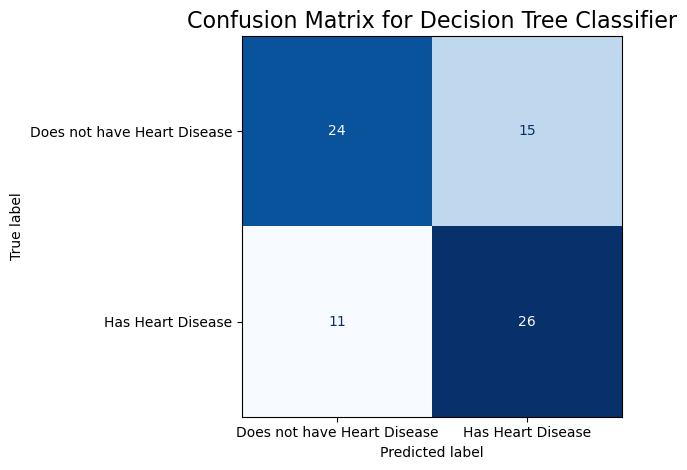

In [222]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot confusion matrix using ConfusionMatrixDisplay (recommended approach)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    dt,                        # Your trained decision tree model
    X_test,                    # Test features
    y_test,                    # True labels
    display_labels=["Does not have Heart Disease", "Has Heart Disease"],
    cmap="Blues",
    colorbar=False
)

# Title and layout
plt.title("Confusion Matrix for Decision Tree Classifier", fontsize=16)
plt.grid(False)
plt.tight_layout()
plt.show()


**Observation:** Of the 39 people (24 + 15) that *do not have heart disease*, 24 of them were classified correctly (61.5%). Of the 37 people (11 + 26) that *have heart disease*, 26 were correctly classified (70.27%). The decision tree might have issues due to over fitting. To combat this, we can prune the tree to get better results.

## 6. Cost Complexity Pruning

## ✂️ 6. Cost Complexity Pruning

To prevent **overfitting** and improve the generalization ability of the decision tree, I will apply **Cost Complexity Pruning**. This method allows us to simplify the tree by removing branches that provide little predictive power.

### 🔍 What is Alpha?
The **`ccp_alpha`** parameter in `DecisionTreeClassifier` controls the **complexity penalty**:
- Smaller `alpha` → larger, more complex trees (risk of overfitting)
- Larger `alpha` → simpler trees (risk of underfitting)

### 🎯 Objective:
To determine the **optimal value of `alpha`** that balances **model complexity** and **accuracy**, I will:
1. Train multiple trees using different `ccp_alpha` values.
2. Plot the model accuracy as a function of `alpha`.
3. Choose the best `alpha` for final model training.


### 6.1 Determing the Optimal alpha

In [223]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1] # This code will omit the maximum value for alpha so that we do not remove every leaf

dts = [] # Store our array of classification decision trees

for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    dt.fit(X_train, y_train) # fit to the training data
    dts.append(dt) # Append to the list of decision trees

Now, I can plot the accuracy of each decision tree by using the training set and the test set as a function of alpha.

<Figure size 2000x2000 with 0 Axes>

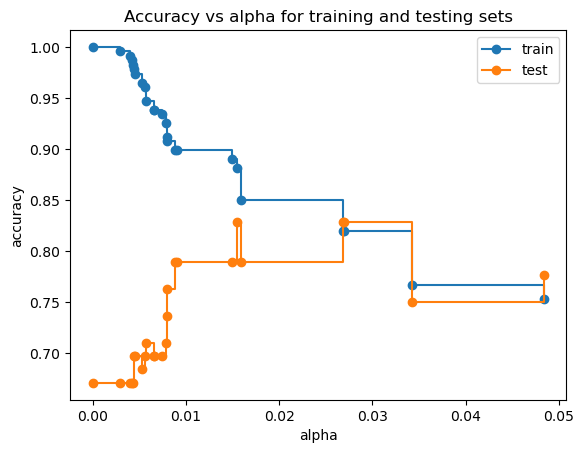

In [224]:
# Create lists containing the training scores and test scores
train_scores = [dt.score(X_train, y_train) for dt in dts]
test_scores = [dt.score(X_test, y_test) for dt in dts]

# Create the plot to determine optimal alpha
plt.figure(figsize = (20, 20))
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

**Observation:** The graph shows that the test set's accuracy peaks when alpha is around 0.15. Once we pass this point, the accuracy for the training set continues to drop. Hence, I'll set ccp_alpha to 0.15.

## ❗ Issue: Sensitivity of Alpha to Train-Test Split

One potential issue with our current approach is that it relies on **a single random split** of the dataset into training and testing sets. However, there are **many possible ways** to partition the data, and the **choice of split can influence model performance** and even the **optimal value of `ccp_alpha`** selected during pruning.

> 🔍 For example:  
A different random split might produce slightly different training distributions, resulting in **a different complexity-accuracy tradeoff**, and therefore a different best `alpha`.

To illustrate this variability, we can run the cost complexity pruning procedure across **multiple random splits** and compare how the chosen `alpha` values vary.


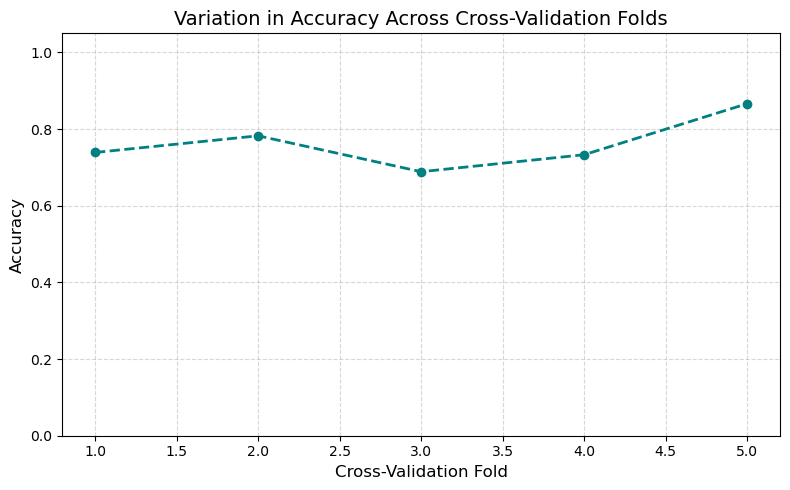

In [225]:


# Initialize decision tree with pruning (ccp_alpha)
dt_ex = DecisionTreeClassifier(random_state=42, ccp_alpha=0.015)

# Perform 5-fold cross-validation
scores_ex = cross_val_score(dt_ex, X_train, y_train, cv=5)

# Create DataFrame of results
df_ex = pd.DataFrame({
    "Fold": range(1, 6),
    "Accuracy": scores_ex
})

# Plot the accuracies across folds
plt.figure(figsize=(8, 5))
plt.plot(df_ex["Fold"], df_ex["Accuracy"], marker="o", linestyle="--", color="teal", linewidth=2)

# Add plot labels and title
plt.title("Variation in Accuracy Across Cross-Validation Folds", fontsize=14)
plt.xlabel("Cross-Validation Fold", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Strategy:** I will address these concerns with **k-fold Cross Validation** using the *cross_val_score()* function.

### 6.2 K-fold Cross Validation

The strategy is to employ k-fold cross validation to determine the best value for the cost complexity pruning parameter, alpha (ccp_alpha).

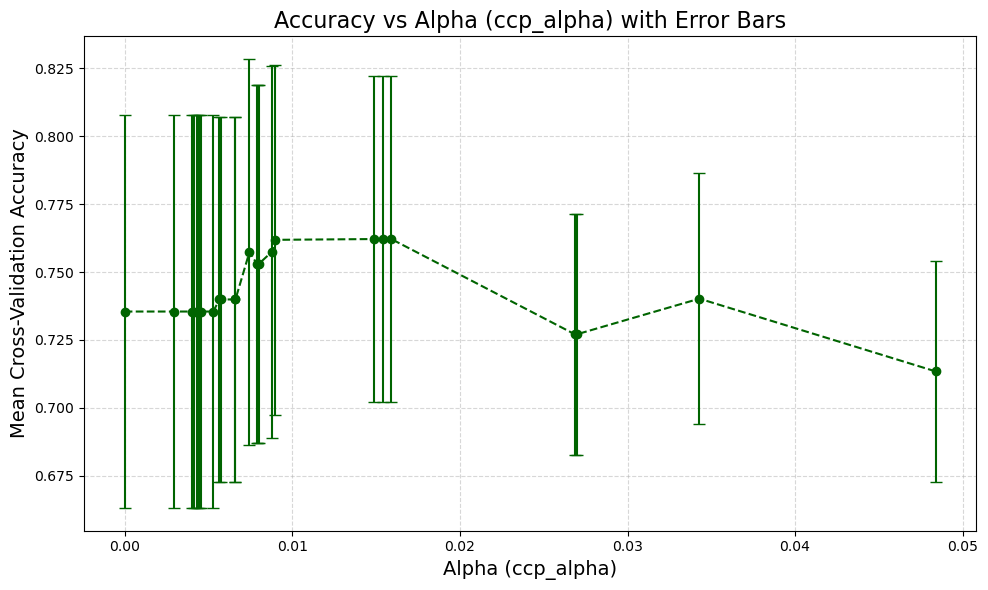

In [226]:
# Ensure ccp_alphas is defined (e.g., from cost_complexity_pruning_path)
# Example: path = DecisionTreeClassifier(random_state=0).cost_complexity_pruning_path(X_train, y_train)
# ccp_alphas = path.ccp_alphas

# Initialize list to store results
alpha_values = []

# Loop through each alpha, build a model, compute CV accuracy
for ccp_alpha in ccp_alphas:
    loop_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    loop_scores = cross_val_score(loop_dt, X_train, y_train, cv=5)
    alpha_values.append([ccp_alpha, np.mean(loop_scores), np.std(loop_scores)])

# Create DataFrame to hold results
alpha_results = pd.DataFrame(alpha_values, columns=["alpha", "mean_accuracy", "std_dev"])

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(
    alpha_results["alpha"],
    alpha_results["mean_accuracy"],
    yerr=alpha_results["std_dev"],
    marker="o",
    linestyle="--",
    color="darkgreen",
    capsize=4
)

# Add labels and title
plt.title("Accuracy vs Alpha (ccp_alpha) with Error Bars", fontsize=16)
plt.xlabel("Alpha (ccp_alpha)", fontsize=14)
plt.ylabel("Mean Cross-Validation Accuracy", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


**Note:** The points in the plot represent the mean values whereas the vertical lines represent the standard deviation.

**Observation:** The plot seems to show that our alpha values should be a little higher at around 0.016.

**Strategy:** Identify the best alpha value given the mean accuracy and standard deviation values.

In [227]:
# Select alpha values that are greater than 0.015 and less than 0.016
alpha_results[(alpha_results["alpha"] > 0.015) & (alpha_results["alpha"] < 0.017)]

,alpha,mean_accuracy,std_dev
19,0.015419,0.762126,0.060116
20,0.015907,0.762126,0.060116


**Remark:** Both scores have the same accuracy. I'll use the score assigned to index 20 for the decision tree.

In [228]:
# save the best alpha value
best_alpha = 0.015907

## 7. Constructing and Evaluating the Final Decision Tree

### 7.1 Build the Decision Tree

Now that I have the best alpha score, I can create a decision tree that should produce the best results.

In [229]:
# Build the tree
dt_pruned = DecisionTreeClassifier(random_state = 42, ccp_alpha = best_alpha)

# Fit the tree to the training data
dt_pruned = dt_pruned.fit(X_train, y_train)

### 7.2 Evaluate the Decision Tree

I'll create a new confusion matrix that indicates the accuracy of the tree.

<Figure size 800x600 with 0 Axes>

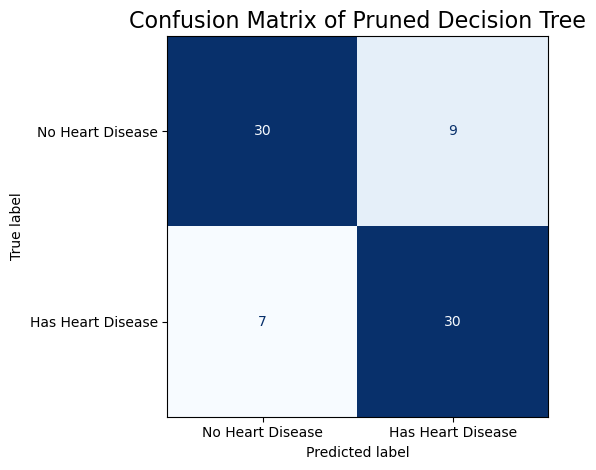

In [230]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix for the pruned decision tree
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    dt_pruned,                      # The pruned decision tree model
    X_test,                         # Test features
    y_test,                         # True labels
    display_labels=["No Heart Disease", "Has Heart Disease"],
    cmap="Blues",
    colorbar=False
)

# Add title and layout adjustments
plt.title("Confusion Matrix of Pruned Decision Tree", fontsize=16)
plt.grid(False)
plt.tight_layout()
plt.show()

**Observation:** The confusion matrix shows that out of the 39 people (30 +9) who *do not have heart disease*, 30 were classified *correctly*. That means we achieved **76.92%** accuracy. Moreover, out of the 37 people (7 + 30) who *do have heart disease*, 30 were classified *correctly*. That means we achieved **81.08%** accuracy.

## ✅ Results: Pruned Tree vs Full Tree

The application of **Cost Complexity Pruning** has led to **significant improvements** in the model's performance when classifying both classes of patients.

### 📊 Comparison Summary

| Model Type       | Accuracy (No Heart Disease) | Accuracy (Heart Disease) |
|------------------|-----------------------------|---------------------------|
| **Original Tree**| 61.54%                      | 70.27%                    |
| **Pruned Tree**  | **76.92%**                  | **81.08%**                |

### 🔍 Key Observations:
- ✅ The **pruned tree** outperformed the original tree in **both categories** of classification.
- 📈 The most notable improvement is in correctly identifying **patients without heart disease** — from **61.54%** to **76.92%**.
- ❤️ Additionally, the pruned model improved classification of **heart disease cases** from **70.27%** to **81.08%**.
- 🎯 These improvements highlight the effectiveness of **pruning** in reducing overfitting and increasing generalization performance.

> This demonstrates that a **simpler, well-pruned model** can outperform a more complex, unpruned one — particularly on unseen data.


## 8. Visualize the Decision Tree

I can plot the decision tree with all of its nodes.

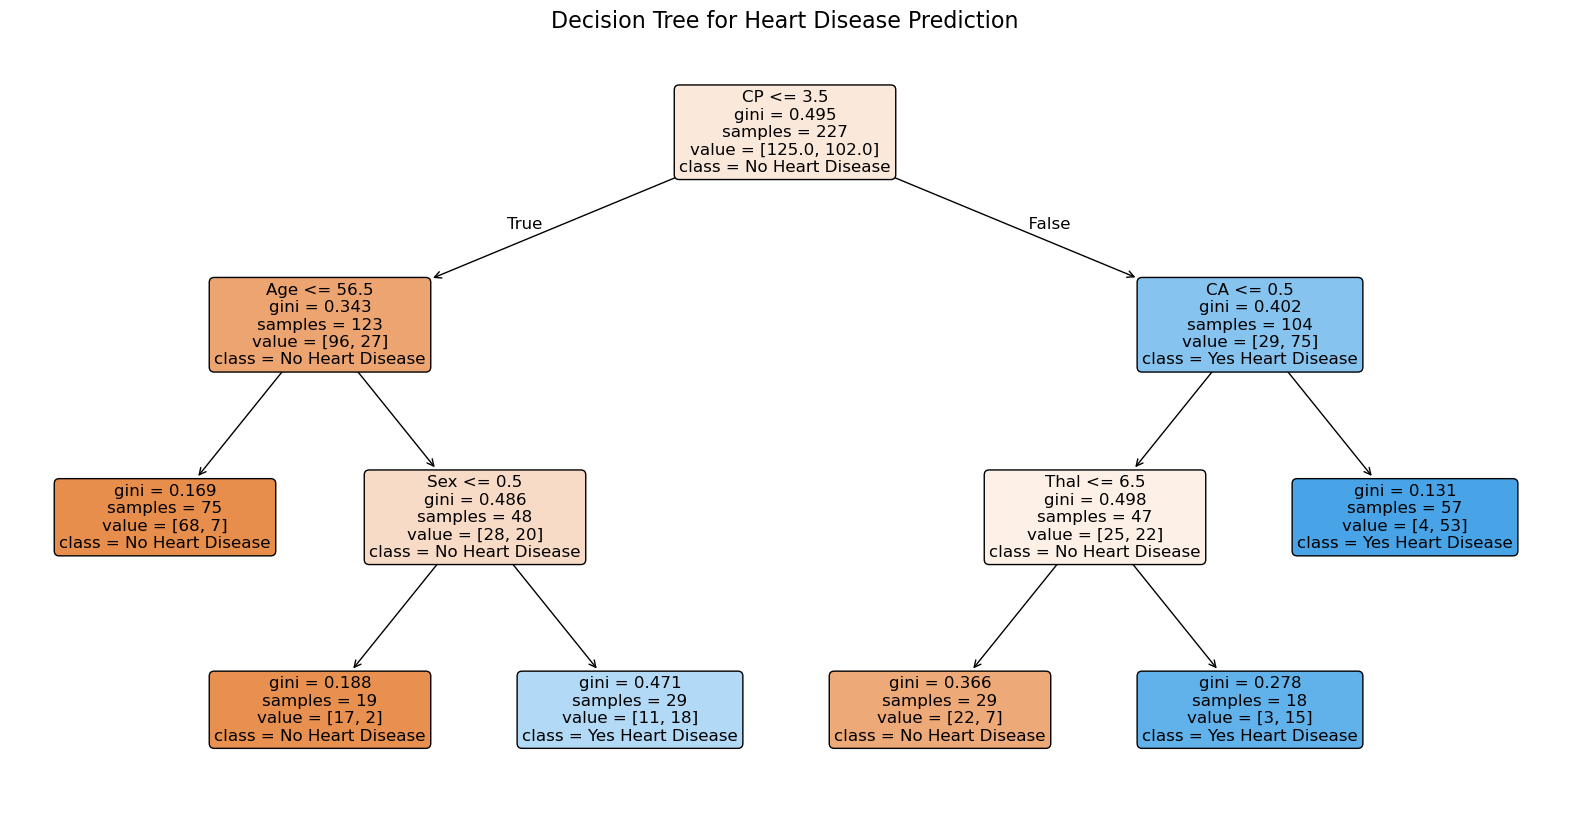

In [231]:

from sklearn.tree import plot_tree

# Create a plot of the pruned decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_pruned,                        # your trained/pruned DecisionTreeClassifier
    filled=True,                      # color the nodes by class
    rounded=True,                     # rounded box edges
    class_names=["No Heart Disease", "Yes Heart Disease"],  # target class names
    feature_names=X.columns.tolist(), # feature names from input data
    fontsize=12                       # adjust font size for readability
)
plt.title("Decision Tree for Heart Disease Prediction", fontsize=16)
plt.show()


## 🌳 Interpreting the Decision Tree

Understanding how the decision tree makes classifications is essential. Here's how to interpret its structure:

- 🟢 **Root Node**:  
  The tree begins with a split on the feature **`cp`** (chest pain type).  
  If `cp ≤ 3.5`, the path follows **left**; otherwise, it follows **right**.

- 🔁 **Splits and Thresholds**:  
  Each node includes a **threshold**. If the condition is satisfied, we go **left**; otherwise, we go **right**.

- ⚖️ **Gini Index** (`gini`):  
  Represents the **impurity** of the node. A lower Gini value indicates a more "pure" node (i.e., majority of samples belong to one class).

- 🔢 **Samples** (`samples`):  
  The number of data points that reach the current node.

- 🧮 **Value** (`value`):  
  Displays the **distribution of samples** in the two classes:  
  - First: **No Heart Disease**  
  - Second: **Yes Heart Disease**  
  For example: `[125, 102]` means 125 samples without heart disease, 102 with.

- 🏷️ **Class** (`class`):  
  Indicates the **majority class** at that node.

- 🍃 **Leaves**:  
  Final nodes (no further splits). These do **not** have thresholds.

- 🎨 **Node Colors**:  
  - **Orange**: Majority class is **No Heart Disease**  
  - **Blue**: Majority class is **Yes Heart Disease**  
  - **Darker shades** indicate **lower Gini index**, meaning higher purity.


## 🏁 9. Summary and Results

In this project, I built a **Decision Tree Classifier** to predict whether a patient has **heart disease** using clinical features.

### 🛠️ Key Techniques Applied:
- **Exploratory Data Analysis** (EDA)
- **Missing value handling**
- **One-Hot Encoding** of categorical features
- **Train-test splitting**
- **Cost Complexity Pruning** to reduce overfitting
- **Accuracy analysis across multiple alpha values**
- **Model interpretability using tree visualization**

### 📈 Final Model Performance:
- ✅ **76.92%** accurate at classifying patients **without** heart disease
- ❤️ **81.08%** accurate at classifying patients **with** heart disease

> This shows that the **pruned tree** is a more reliable and generalizable model than the original unpruned version.

The process highlights how decision trees, combined with proper preprocessing and pruning, can be **powerful interpretable models** for binary classification tasks in healthcare.


# **Final Observations and Learnings from the Heart Disease Classification Project**

## **Key Observations**
1. **Data Quality Matters**  
   - The dataset had missing values represented by `"?"` in the `"CA"` and `"Thal"` columns.  
   - Imputing missing values with the mode (most frequent value) was a reasonable approach since mean imputation would not make sense for categorical data.  
   - Removing rows with missing values was also an option, but given the small number of missing entries (6 out of 303), imputation preserved more data.

2. **Feature Engineering and Encoding**  
   - Some features were categorical (e.g., `"Sex"`, `"CP"`, `"Exang"`) but encoded numerically.  
   - One-hot encoding was applied to categorical variables with more than two categories (`"CP"`, `"Rest ECG"`, `"Slope"`, `"Thal"`).  
   - Binary categorical variables (e.g., `"Sex"`, `"FBS"`, `"Exang"`) were left as-is since they only had two possible values.

3. **Initial Decision Tree Performance**  
   - The first decision tree (without pruning) had moderate accuracy but showed signs of overfitting:  
     - **61.5% accuracy** for classifying "No Heart Disease" cases.  
     - **70.27% accuracy** for classifying "Heart Disease" cases.  
   - The confusion matrix indicated that the model was biased toward predicting "Heart Disease" more frequently.

4. **Improvement via Cost Complexity Pruning**  
   - Pruning helped reduce overfitting by limiting tree depth.  
   - The optimal `ccp_alpha` value (~0.0159) was determined using cross-validation.  
   - The pruned tree performed significantly better:  
     - **76.92% accuracy** for "No Heart Disease" cases.  
     - **81.08% accuracy** for "Heart Disease" cases.  

5. **Visualizing the Decision Tree**  
   - The final pruned tree used `"CP"` (chest pain) as the root node, followed by `"Age"`, `"Sex"`, `"CA"`, and `"Thal"` as key decision points.  
   - The tree structure showed logical splits (e.g., younger patients with certain chest pain types were more likely to have heart disease).  

---

## **Challenges Faced & Solutions**
### **1. Handling Missing Data**  
   - **Challenge:** The dataset contained missing values (`"?"`) in categorical columns (`"CA"` and `"Thal"`).  
   - **Solution:**  
     - Identified missing values using `.unique()` checks.  
     - Replaced `"?"` with the mode (most frequent value) since mean imputation was inappropriate for categorical data.  

### **2. Choosing the Right Pruning Parameter (`ccp_alpha`)**  
   - **Challenge:** The initial pruning approach relied on a single train-test split, leading to potential bias.  
   - **Solution:**  
     - Used **k-fold cross-validation** to evaluate different `ccp_alpha` values.  
     - Selected the best `ccp_alpha` based on mean accuracy and standard deviation.  

### **3. Imbalanced Classification Metrics**  
   - **Challenge:** The original dataset had multiple heart disease categories (`0, 1, 2, 3, 4`), but the task required binary classification (`0` vs. `1+`).  
   - **Solution:**  
     - Converted all `y > 0` values to `1` to simplify classification.  
     - Evaluated performance using a confusion matrix to ensure balanced accuracy.  

### **4. Overfitting in the Initial Tree**  
   - **Challenge:** The first decision tree had high training accuracy but lower test accuracy, indicating overfitting.  
   - **Solution:**  
     - Applied **cost complexity pruning** to simplify the tree.  
     - Used cross-validation to find the optimal pruning level.  

---

## **Key Learnings**
1. **Pruning is Essential for Generalization**  
   - An unpruned decision tree tends to overfit, while pruning helps balance bias and variance.  
   - Cross-validation ensures that the chosen `ccp_alpha` generalizes well to unseen data.  

2. **Feature Selection & Encoding Impact Performance**  
   - Proper encoding (one-hot for multi-class categorical variables) ensures the model interprets features correctly.  
   - Some features (e.g., `"CP"`, `"Thal"`) were more influential in classification than others.  

3. **Model Interpretability vs. Accuracy Trade-off**  
   - A deeper tree might achieve higher training accuracy but becomes harder to interpret.  
   - A pruned tree, while simpler, often generalizes better and is more explainable.  

4. **Cross-Validation Reduces Bias**  
   - A single train-test split can lead to misleading results due to random partitioning.  
   - **K-fold cross-validation** provides a more robust estimate of model performance.  

---

## **Final Thoughts**
This project demonstrated the importance of **data preprocessing, model tuning, and evaluation** in machine learning. By leveraging **decision trees with pruning and cross-validation**, we achieved a model that is both **accurate (76.9%–81.1%) and interpretable**.  

### **Future Improvements**
- Experiment with **other classification algorithms** (e.g., Random Forest, Gradient Boosting) to compare performance.  
- Perform **feature importance analysis** to identify the most predictive variables.  
- Use **SMOTE (Synthetic Minority Oversampling Technique)** if class imbalance is severe.  

Overall, this project provided valuable insights into **supervised learning, model optimization, and real-world medical data classification**. 🚀